<a href="https://colab.research.google.com/github/sushantkumar-estech/Celsius-to-Fahrenheit-using-ANN/blob/master/Simple_Neural_Model_to_convert_Celsius_to_Fahrenheit_using_ANN_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP#0: Import Libraries

In [93]:
# !pip install tensorflow-gpu==2.0.0.alpha0

In [94]:
#Installing compatible tensorflow 
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

In [95]:
#Importing required libraries for data processing and visualization

import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt


In [96]:
print(tf.__version__)

1.15.2


## STEP #1: Import *Dataset*

In [97]:
#Mouting colab with the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
#Importing dataset from drive

temp_df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Celsius to Fahrenheit/Celsius_Fahrenheit_dataset_1000.csv')

In [99]:
temp_df.head() #showing top rows

,Celsius,Fahrenheit
0,-67,-88.6
1,40,104.0
2,-97,-142.6
3,57,134.6
4,-50,-58.0


In [100]:
temp_df.tail(5) #last 5 rows of the dataset     

,Celsius,Fahrenheit
995,-80,-112.0
996,50,122.0
997,18,64.4
998,47,116.6
999,-67,-88.6


In [101]:
temp_df.describe() #description about dataset

,Celsius,Fahrenheit
count,1000.000000,1000.000000
mean,-0.029000,31.947800
std,57.334173,103.201511
min,-100.000000,-148.000000
25%,-50.000000,-58.000000
50%,-2.000000,28.400000
75%,50.000000,122.000000
max,100.000000,212.000000


In [102]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     1000 non-null   int64  
 1   Fahrenheit  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


`## STEP #2: Visualization of Dataset`

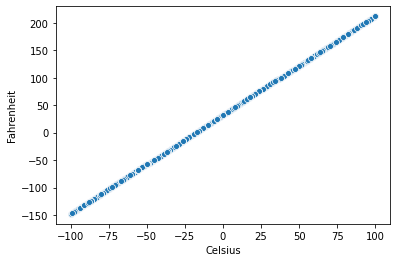

In [103]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

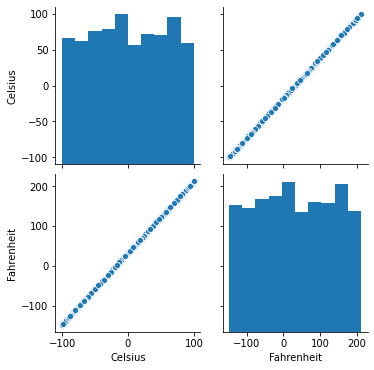

In [104]:
import seaborn as sns
sns.pairplot(temp_df)

## STEP #3: Creating Training & Testing Dataset

In [105]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

## STEP #4: Build & Train the Model

In [106]:
X_train.shape

(1000,)

In [107]:
y_train.shape

(1000,)

In [108]:
# in tensorflow 2.0, keras API come automatically with tensorflow 2.0
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 32 , input_shape = (1,)))
#Dense when we have fully connected atificial neural network
# now we are adding one more layer to the network
model.add(tf.keras.layers.Dense(units = 32))
# now adding the output layer
model.add(tf.keras.layers.Dense(units = 1))

In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(optimizer= tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [111]:
epochs_hist = model.fit(X_train, y_train, epochs=30, validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 0s 327us/sample - loss: 136856949.3247 - val_loss: 45079646.4000
Epoch 2/30
800/800 [==============================] - 0s 58us/sample - loss: 7230285.3033 - val_loss: 652791.6825
Epoch 3/30
800/800 [==============================] - 0s 61us/sample - loss: 367615.9052 - val_loss: 149643.4519
Epoch 4/30
800/800 [==============================] - 0s 61us/sample - loss: 34783.4066 - val_loss: 15538.7335
Epoch 5/30
800/800 [==============================] - 0s 58us/sample - loss: 3711.3054 - val_loss: 1434.1834
Epoch 6/30
800/800 [==============================] - 0s 62us/sample - loss: 223.7546 - val_loss: 16.4950
Epoch 7/30
800/800 [==============================] - 0s 59us/sample - loss: 8.9355 - val_loss: 3.5384
Epoch 8/30
800/800 [==============================] - 0s 59us/sample - loss: 0.9850 - val_loss: 0.0499
Epoch 9/30
800/800 [==============================] - 0s 61us/sample - loss:

## STEP #5: Evaluating the Model

In [112]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

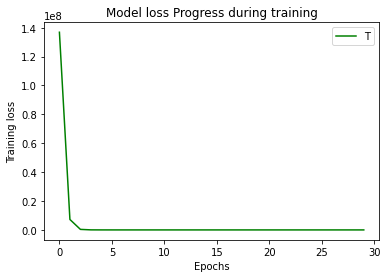

In [113]:
plt.plot(epochs_hist.history['loss'], color='green', label='Training loss')
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

Text(0, 0.5, 'Training loss')

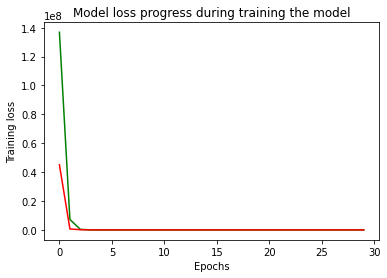

In [114]:
plt.plot(epochs_hist.history['loss'], color='green', label='Training loss')
plt.plot(epochs_hist.history['val_loss'], color='red', label='Validation loss')

plt.title('Model loss progress during training the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')

In [115]:
model.get_weights()

[array([[ 0.31684262, -0.13649549,  0.08002999, -0.02876133,  0.51983815,
          0.23006576,  0.42301896,  0.62285876, -0.6883042 ,  0.07452754,
          0.14337465,  0.29085007, -0.6172755 , -0.27851343, -0.29905182,
         -0.20724124, -0.17715083, -0.5182468 , -0.00633787, -0.20600568,
         -0.1458936 , -0.0270188 ,  0.03254286, -0.06360524,  0.07063524,
         -0.23790228,  0.217816  ,  0.45300877, -0.04914914,  0.2284995 ,
          0.621883  ,  0.08191345]], dtype=float32),
 array([-0.17254609,  0.5538436 , -0.5820979 , -0.18795753, -0.42109695,
        -0.85265034, -0.51222354, -1.3732886 ,  0.70578086,  0.20732443,
        -0.3917156 , -0.9183064 ,  1.3490217 ,  0.05200289,  0.1821131 ,
         0.4433836 ,  0.06053328,  1.0452636 , -0.7172653 ,  0.09782369,
         1.0148686 , -0.42098904,  0.28335866,  0.28257787,  0.30584154,
         0.07707024, -0.6466866 , -1.02976   , -0.14137493, -0.7900642 ,
        -0.6261846 , -0.5574609 ], dtype=float32),
 array([[-0.11

In [116]:
# Use the same model to perform predictions
Temp_C = 12
Temp_F = model.predict([Temp_C])
print('Temprature in Fahrenheit using simple ANN=', Temp_F)

Temprature in Fahrenheit using simple ANN= [[53.60002]]


In [117]:
# Lets confirm with the equation
Temp_F = 9/5 * Temp_C + 32
print('Temprature in Fahrenheit using normal equation=', Temp_F)

Temprature in Fahrenheit using normal equation= 53.6
